# Employee Turnover Analytics 

Portobello Tech is an app innovator who has devised an intelligent way of predicting 
employee turnover within the company. It periodically evaluates employees' work 
details, including the number of projects they worked on, average monthly working 
hours, time spent in the company, promotions in the last five years, and salary level. 
Data from prior evaluations shows the employees’ satisfaction in the workplace. The 
data could be used to identify patterns in work style and their interest in continuing to 
work for the company.  
The HR Department owns the data and uses it to predict employee turnover. 
Employee turnover refers to the total number of workers who leave a company over 
time. 

As the ML Developer assigned to the HR Department, you have been asked to create 
ML programs to: 
1. Perform data quality checks by checking for missing values, if any. 
2. Understand what factors contributed most to employee turnover at EDA. 
3. Perform clustering of employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using the SMOTE technique. 
5. Perform k-fold cross-validation model training and evaluate performance.  
6. Identify the best model and justify the evaluation metrics used.  
7. Suggest various retention strategies for targeted employees. 

Data will be modified from:  
https://www.kaggle.com/liujiaqi/hr-comma-sepcsv

## Perform data quality checks by checking for missing values, if any.

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('HR_comma_sep.csv')

In [368]:
# Display data
print(df.head())
print(df.info())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

There is a typo. Instead of column '*Department*' there is '*sales*'. Correct the error by chenging the title from '*sales*' to '*Department*'

In [374]:
df = df.rename(columns={
    "sales": "Department",
})

In [378]:
# print top rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [380]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


## Understand what factors contributed most to employee turnover at EDA.

Draw a heatmap of the *correlation matrix* between all numerical features. 

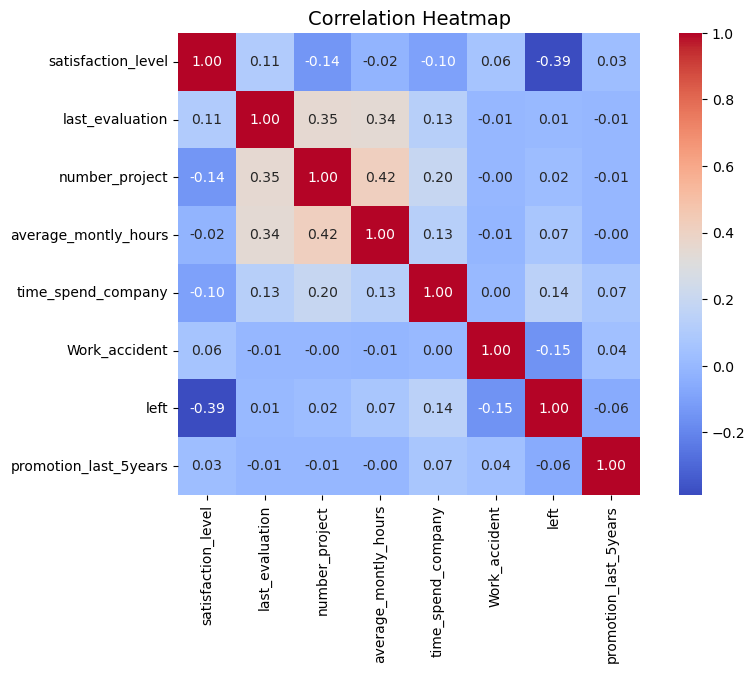

In [385]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr() # Correlation matrix

# Draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Draw the distribution plot

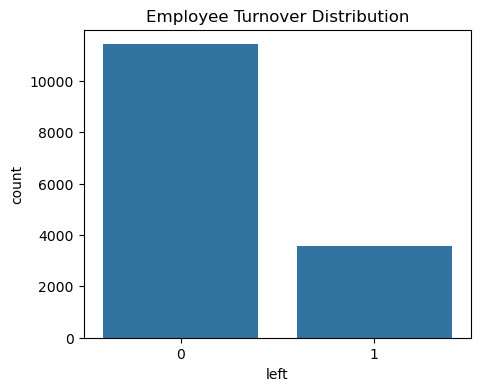

In [388]:
# Employee turnover distribution
plt.figure(figsize=(5,4))
sns.countplot(x="left", data=df)
plt.title("Employee Turnover Distribution")
plt.show()

In [390]:
print(df['left'].value_counts(normalize=True))

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


The data is not balanced. 76.2% of employee are currently employed in the company and 23.8% have left

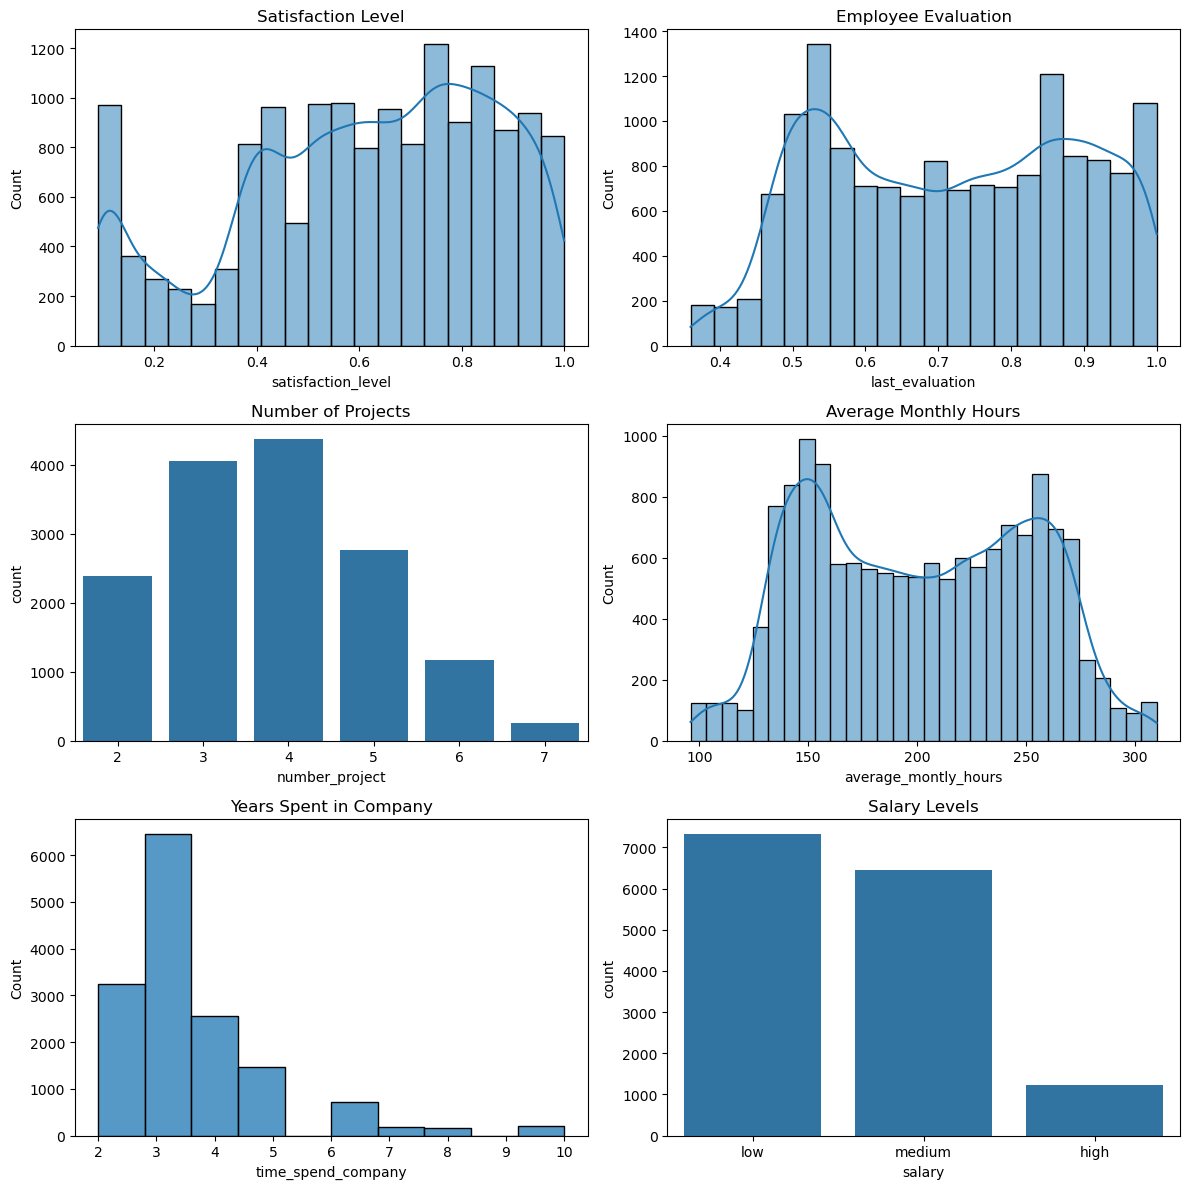

In [393]:
# Univariate Analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(df['satisfaction_level'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Satisfaction Level")

sns.histplot(df['last_evaluation'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Employee Evaluation")

sns.countplot(x='number_project', data=df, ax=axes[1,0])
axes[1,0].set_title("Number of Projects")

sns.histplot(df['average_montly_hours'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Average Monthly Hours")

sns.histplot(df['time_spend_company'], bins=10, kde=False, ax=axes[2,0])
axes[2,0].set_title("Years Spent in Company")

sns.countplot(x='salary', data=df, ax=axes[2,1])
axes[2,1].set_title("Salary Levels")

plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1488\4065431509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="satisfaction_level", data=df, ax=axes[0,0], palette="coolwarm")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1488\4065431509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="last_evaluation", data=df, ax=axes[0,1], palette="coolwarm")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1488\4065431509.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="average_montly_hours", data=df, ax=axes[1,1

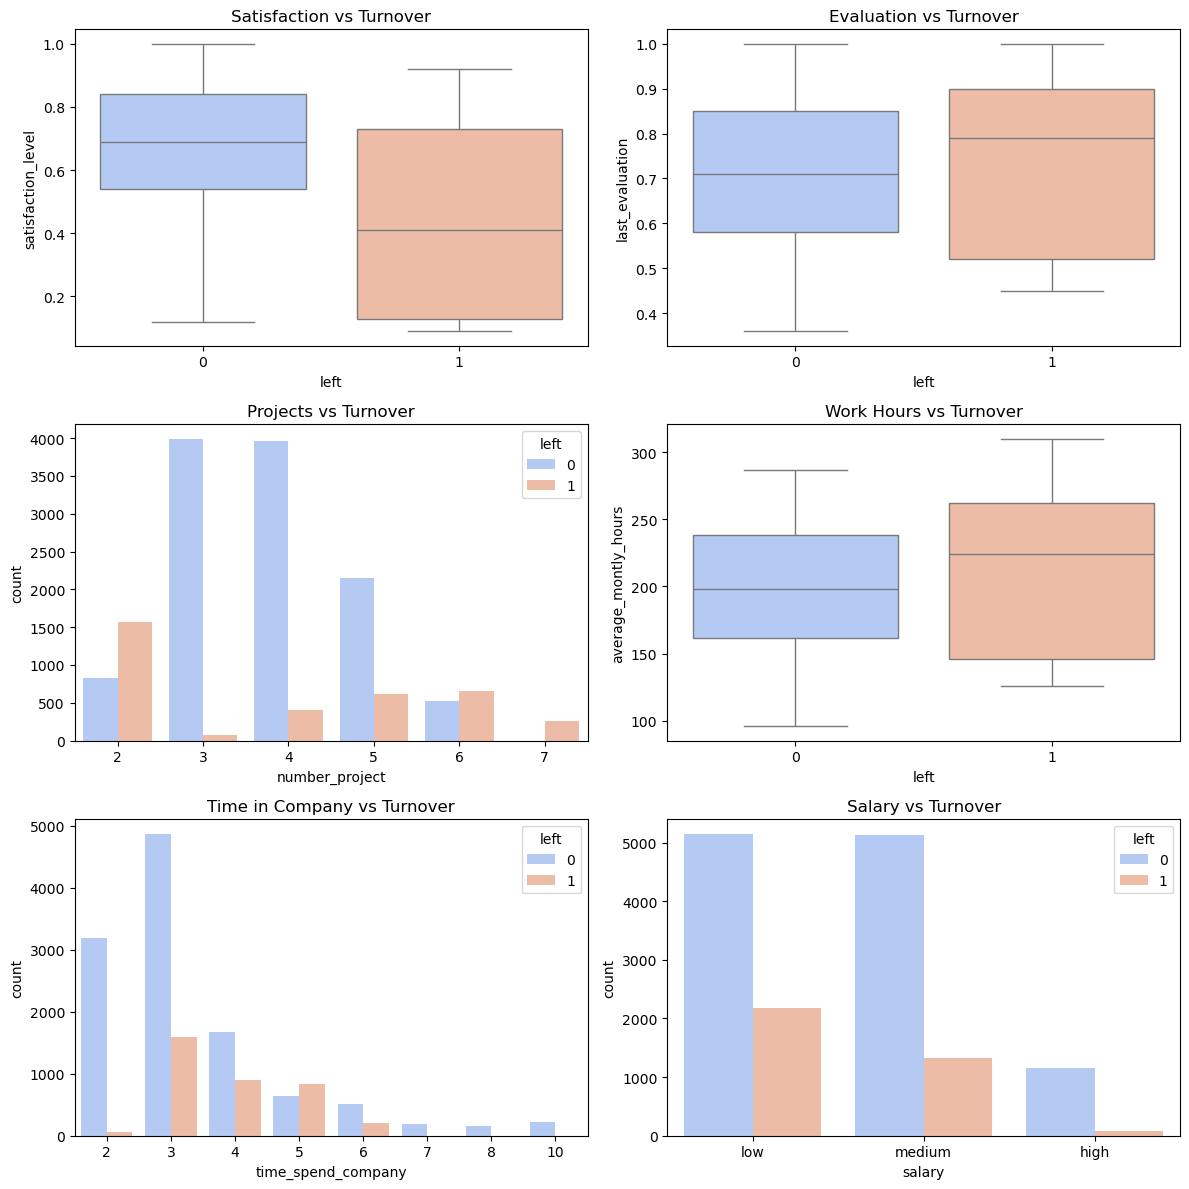

In [395]:
# Bivariate Analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.boxplot(x="left", y="satisfaction_level", data=df, ax=axes[0,0], palette="coolwarm")
axes[0,0].set_title("Satisfaction vs Turnover")

sns.boxplot(x="left", y="last_evaluation", data=df, ax=axes[0,1], palette="coolwarm")
axes[0,1].set_title("Evaluation vs Turnover")

sns.countplot(x="number_project", hue="left", data=df, ax=axes[1,0], palette="coolwarm")
axes[1,0].set_title("Projects vs Turnover")

sns.boxplot(x="left", y="average_montly_hours", data=df, ax=axes[1,1], palette="coolwarm")
axes[1,1].set_title("Work Hours vs Turnover")

sns.countplot(x="time_spend_company", hue="left", data=df, ax=axes[2,0], palette="coolwarm")
axes[2,0].set_title("Time in Company vs Turnover")

sns.countplot(x="salary", hue="left", data=df, ax=axes[2,1], palette="coolwarm")
axes[2,1].set_title("Salary vs Turnover")

plt.tight_layout()
plt.show()

Draw the bar plot of the employee project count of both employees who 
left and stayed in the organization, and give your inferences from the plot

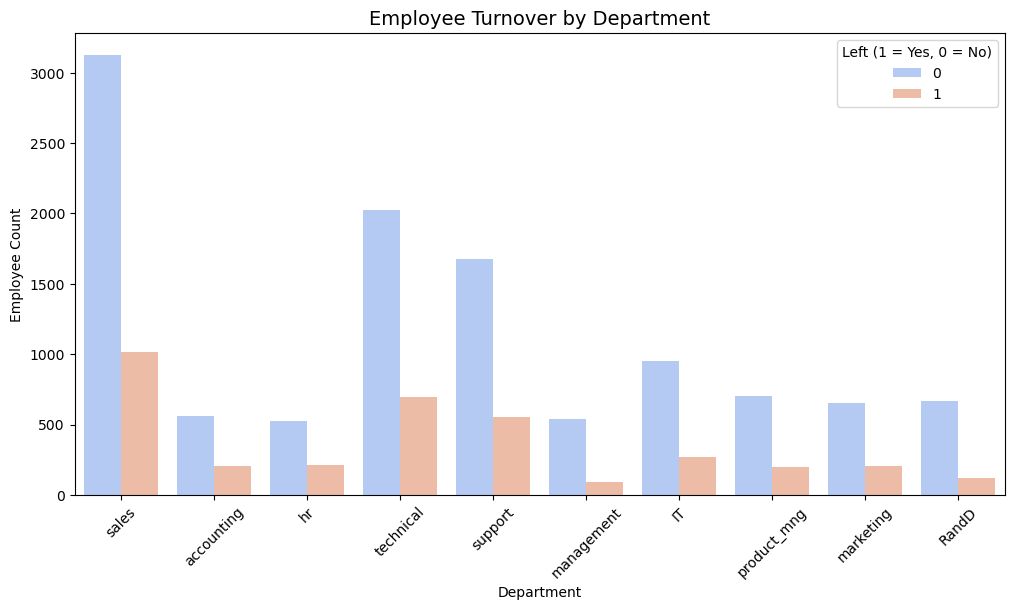

In [398]:
plt.figure(figsize=(12,6))
sns.countplot(x="Department", hue="left", data=df, palette="coolwarm")

plt.title("Employee Turnover by Department", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.legend(title="Left (1 = Yes, 0 = No)")
plt.xticks(rotation=45)
plt.show()

**Observations**:
1. Employees with lower satisfaction level have left
2. In the last evaluation, employees who have left have wider variance as compared to those who have not left.
3. It is observed that there are two classes of employees who have left the company. The first set with single project and the other set with more than 5 projects. The first set employees may not be getting enough exposure so they might have left, where as the other set of employees might be overburdened working on too many projects. Employees with 3-5 projects have better retention as compared to the others.
4. Employees who have left has higher variation in working hours either due to lack of motivation or getting too much of workload.
5. Employees with 2-3 years of experience are the majority. After 5 years of time spent in the company, employees have the tendency to leave the company.
6. Low salaried employees have more tendency to leave the company as compary to high salaried employees.
7. Sales & Technical departments usually show higher turnover due to high targets or workload.

## Perform clustering of employees who left based on their satisfaction and evaluation. 

In [420]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Select only employees who left
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Perform KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
left_df['cluster'] = kmeans.fit_predict(left_df)
score_silhoutte = silhouette_score(left_df,left_df['cluster']) 
print('silhouette score: ',score_silhoutte)

silhouette score:  0.9163877837050199


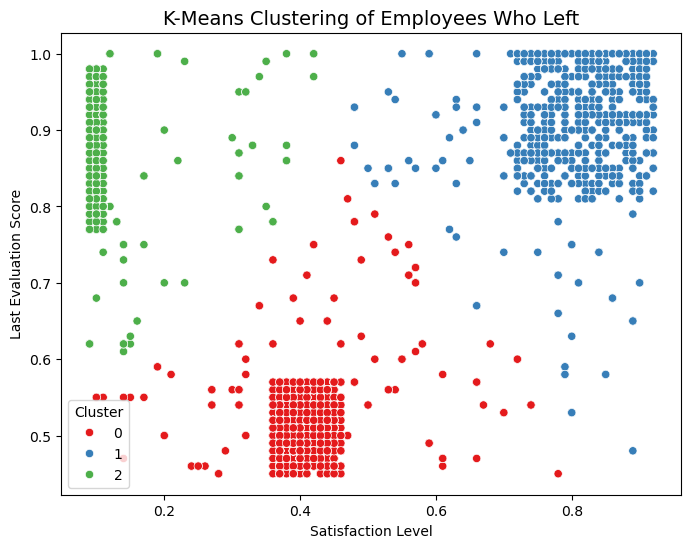

In [422]:
# Visualise clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=left_df,
    x="satisfaction_level", 
    y="last_evaluation",
    hue="cluster",
    palette="Set1"
)
plt.title("K-Means Clustering of Employees Who Left", fontsize=14)
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation Score")
plt.legend(title="Cluster")
plt.show()

#### Observations


**Cluster 0 : Low Satisfaction & Low Evaluation**.
- Employees unhappy & performing poorly. They leave due to dissatisfaction and underperformance.

**Cluster 1 : High Satisfaction & High Evaluation**.
- Employees were satisfied & evaluated well but still left. 
Possible reasons: Better opportunities elsewhere, career growth limitations, or external factors.

**Cluster 2 : Low Satisfaction & High Evaluation**.
- High performers but unhappy.Likely overworked, underappreciated, or underpaid and left despite good performance.
Critical group: Losing them hurts the company.

This shows that not all attrition comes from unhappy employees. Some top performers also leave, and they are the ones HR must target for retention strategies (career growth, recognition, pay raises, flexible work, etc.).

## Handle the left Class Imbalance using the SMOTE technique. 


Pre-process the data by converting categorical columns to numerical 
columns


In [429]:
# Separate categorical and numerical features
categorical_cols = ['Department', 'salary']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

categorical_df = df[categorical_cols]
numerical_df = df[numerical_cols]

print("Categorical Columns:\n", categorical_df.head())
print("\nNumerical Columns:\n", numerical_df.head())

Categorical Columns:
   Department  salary
0      sales     low
1      sales  medium
2      sales  medium
3      sales     low
4      sales     low

Numerical Columns:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   6              0     1                      0  
2                   4              0     1                      0  
3                   5              0     1                      0  
4         

In [431]:
# One-hot encode categorical variables
categorical_encoded = pd.get_dummies(categorical_df, drop_first=True)

# Combine numerical + encoded categorical
df_processed = pd.concat([numerical_df, categorical_encoded], axis=1)

print("Processed Data:\n", df_processed.head())

Processed Data:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   Department_RandD  Department_accounting  Department_hr  \
0             False       

Do the stratified split of the dataset to train and test in the ratio 80:20 
with random_state=123. 

In [434]:
from sklearn.model_selection import train_test_split
# Features (X) and target (y)
X = df_processed.drop("left", axis=1)
y = df_processed["left"]

# Stratified split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=123
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Class distribution in Train set:\n", y_train.value_counts(normalize=True))
print("Class distribution in Test set:\n", y_test.value_counts(normalize=True))

Train set size: (11999, 18)
Test set size: (3000, 18)
Class distribution in Train set:
 left
0    0.761897
1    0.238103
Name: proportion, dtype: float64
Class distribution in Test set:
 left
0    0.762
1    0.238
Name: proportion, dtype: float64


In [436]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE only on training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original training set class distribution:\n", y_train.value_counts())
print("\nAfter SMOTE (upsampled) training set class distribution:\n", y_train_res.value_counts())

Original training set class distribution:
 left
0    9142
1    2857
Name: count, dtype: int64

After SMOTE (upsampled) training set class distribution:
 left
0    9142
1    9142
Name: count, dtype: int64


## Perform 5-fold cross-validation model training and evaluate performance. 


Identify the best model and justify the evaluation metrics used. 
- Find the ROC/AUC for each model and plot the ROC curve. 
- Find the confusion matrix for each of the models. 
- Explain which metric needs to be used from the confusion matrix: Recall or Precision? 

#### Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [447]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=123)

pipeline_lr = Pipeline(steps=[
    ('smote', SMOTE(random_state=123)),
    ('scaler', StandardScaler()),
    ('classifier', log_reg)
])



In [449]:
# Tune key hyperparameters
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],   # Regularization strength
    'classifier__penalty': ['l1', 'l2']    # L1 = Lasso, L2 = Ridge
}

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5, # 5-fold cross-validation 
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=123)),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=123,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [450]:
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best ROC-AUC (CV):", grid_search_lr.best_score_)

Best Parameters (Logistic Regression): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}
Best ROC-AUC (CV): 0.8235331875233116


Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.50      0.78      0.61       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.77      0.78      3000



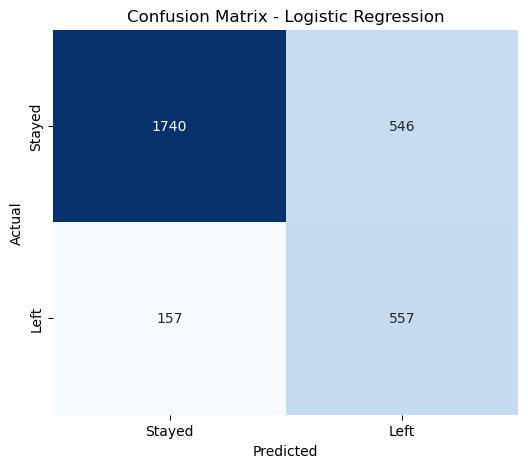

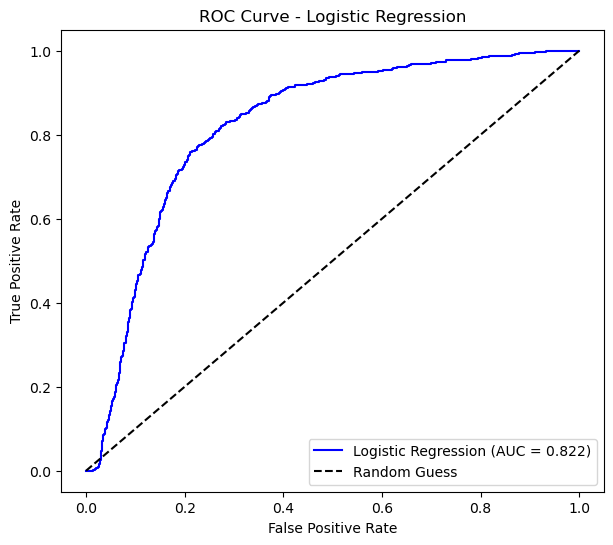

In [453]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Best model
best_lr = grid_search_lr.best_estimator_

# Predict
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})", color="blue")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

#### Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [469]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier(random_state=123, n_jobs=-1)

pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=123)),
    ('classifier', rf)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20]
}

In [471]:
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5, # 5-fold cross-validation 
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=123)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [475]:
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best ROC-AUC (CV):", grid_search_rf.best_score_)

Best Parameters (Random Forest): {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best ROC-AUC (CV): 0.9917726066579183


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



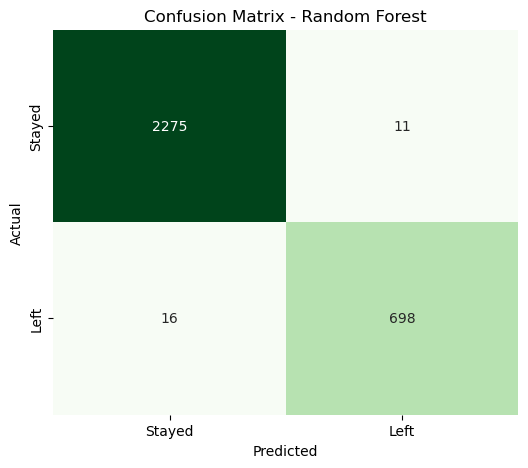

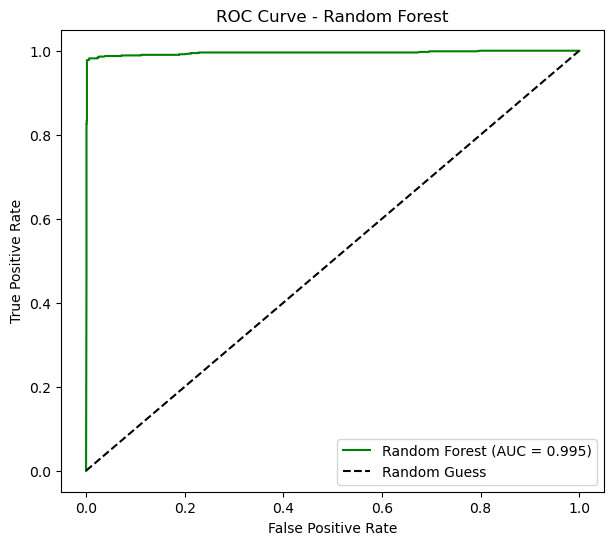

In [477]:
# Best model
best_rf = grid_search_rf.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", color="green")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

#### Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [484]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize Gradient Boosting Classifier
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=123)

pipeline_gb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=123)),
    ('classifier', gb)
])

param_grid = {
    'classifier__n_estimators': [100, 200],   # number of boosting stages
    'classifier__learning_rate': [0.05, 0.1], # shrinkage
    'classifier__max_depth': [3, 5]           # depth of base learners
}

In [486]:
grid_search_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5, # 5-fold cross-validation 
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=123)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

Classification Report (Gradient Boosting):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.96      0.96       714

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



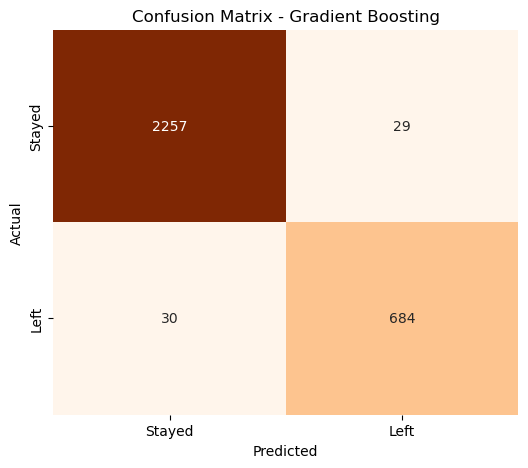

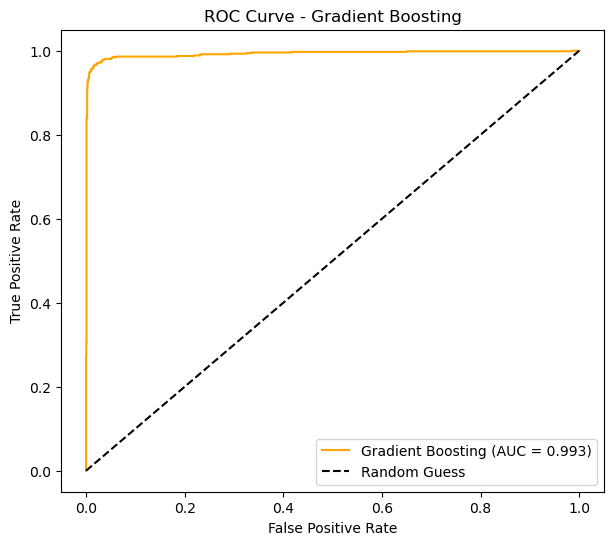

In [490]:
# Best model
best_gb = grid_search_gb.best_estimator_

# Predict
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
auc_gb = roc_auc_score(y_test, y_proba_gb)

plt.figure(figsize=(7,6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})", color="orange")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.show()

## Identify the best model and justify the evaluation metrics used. 
**Explain which metric needs to be used from the confusion matrix: Recall 
or Precision?**

- Random Forest and Gradient Boosting performed almost equally well, but Random Forest had slightly better Recall & F1-score. Thus, better for catching employees who may leave.
- Logistic Regression lagged behind in overall performance but is still useful for explainability (understanding which factors affect turnover).
- Random forest has the best AUC among the three models
- Since the business goal is to minimize missed leavers, Random Forest is chosen as the best model.

**Precision vs Recall**

Precision = TP / (TP + FP)
- Quality of positive predictions
- Indicates of all the employees predicted as “leaving,” how many actually left?
- Good metric if cost of false positive is high

Recall = TP / (TP + FN)
- Indicates of all employees who actually left, how many did we catch
- Useful when cost of false negative is high

Precision and Recall are close, and the model is well-balanced. However, Recall is usually more critical than Precision, because:
1. If you miss predicting someone who leaves (FN), the company suffers from resignation, rehiring, and retraining costs.
2. A few false alarms (FPs) might waste some HR resources, but the cost is much lower than losing a valuable employee unexpectedly.

## Suggest various retention strategies for targeted employees. 
Using the best model, predict the probability of employee turnover in the 
test data. 


In [498]:
# Predict probability of leaving
y_proba = best_rf.predict_proba(X_test)[:, 1]

results = pd.DataFrame({"Employee_ID": X_test.index, "Turnover_Prob": y_proba})
print('Probability of leaving\n',results)
print(results['Turnover_Prob'].describe())

Probability of leaving
       Employee_ID  Turnover_Prob
0           10627       0.000585
1            2703       0.339962
2            6059       0.055645
3            3258       0.020000
4            4565       0.003408
...           ...            ...
2995         4961       0.000682
2996         4557       0.060402
2997         6610       0.020987
2998        10327       0.011176
2999          731       0.998002

[3000 rows x 2 columns]
count    3000.000000
mean        0.256573
std         0.403478
min         0.000000
25%         0.000585
50%         0.020554
75%         0.282569
max         1.000000
Name: Turnover_Prob, dtype: float64


Based on the probability score range below, categorize the employees 
into four zones and suggest your thoughts on the retention strategies for 
each zone. 

■ Safe Zone (Green) (Score < 20%) 

■ Low-Risk Zone (Yellow) (20% < Score < 60%) 

■ Medium-Risk Zone (Orange) (60% < Score < 90%) 

■ High-Risk Zone (Red) (Score > 90%).

In [501]:
def categorize_zone(prob):
    if prob < 0.20:
        return "Safe Zone (Green)"
    elif prob < 0.60:
        return "Low-Risk Zone (Yellow)"
    elif prob < 0.90:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

results["Zone"] = results["Turnover_Prob"].apply(categorize_zone)
print('Employee categories based on their turnover probability\n', results)

Employee categories based on their turnover probability
       Employee_ID  Turnover_Prob                    Zone
0           10627       0.000585       Safe Zone (Green)
1            2703       0.339962  Low-Risk Zone (Yellow)
2            6059       0.055645       Safe Zone (Green)
3            3258       0.020000       Safe Zone (Green)
4            4565       0.003408       Safe Zone (Green)
...           ...            ...                     ...
2995         4961       0.000682       Safe Zone (Green)
2996         4557       0.060402       Safe Zone (Green)
2997         6610       0.020987       Safe Zone (Green)
2998        10327       0.011176       Safe Zone (Green)
2999          731       0.998002    High-Risk Zone (Red)

[3000 rows x 3 columns]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1488\1729041967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=zone_counts.index, y=zone_counts.values,


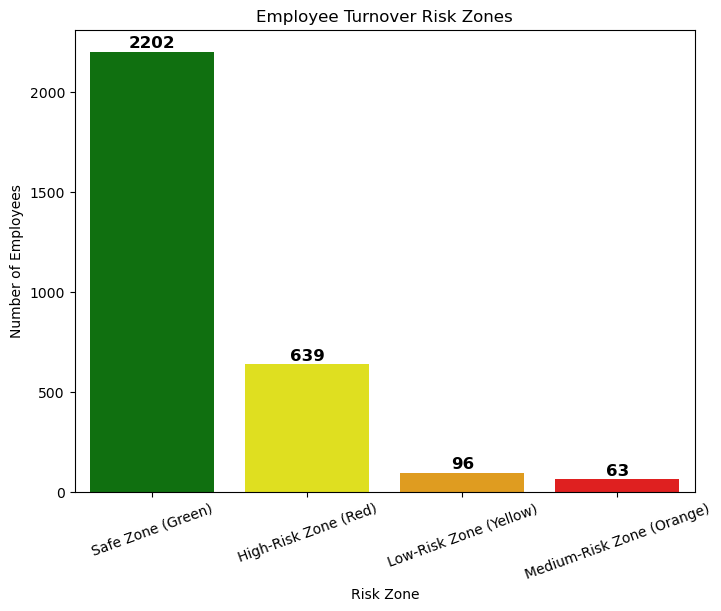

In [503]:
zone_counts = results["Zone"].value_counts()

# Bar plot
plt.figure(figsize=(8,6))
ax = sns.barplot(x=zone_counts.index, y=zone_counts.values, 
                 palette=["green", "yellow", "orange", "red"])

for i, count in enumerate(zone_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Employee Turnover Risk Zones")
plt.xlabel("Risk Zone")
plt.ylabel("Number of Employees")
plt.xticks(rotation=20)
plt.show()

### Retention stratergies:


**Safe Zone (Green) — Score < 20%**

Employees highly engaged, low risk.

**Strategies:**
- Recognize good performance (awards, appreciation).
- Continue existing HR policies.
- Encourage participation in company culture activities.
- Provide steady career progression paths.

**Low-Risk Zone (Yellow) — 20% < Score < 60%**

Generally stable, but some signs of dissatisfaction may exist.

**Stratergies:**

- Conduct surveys to monitor satisfaction.
- Offer skill development programs.
- Provide periodic feedback & career guidance.
- Address workload issues early.


**Medium-Risk Zone (Orange) — 60% < Score < 90%**

Clear signs of disengagement, performance fluctuations.

**Stratergies**

- One-on-one discussions to identify dissatisfaction.
- Offer mentorship for growth opportunities.
- Provide incentives, bonuses, or salary adjustments if fair pay is a concern.
- Workload balancing to prevent burnout.

**High-Risk Zone (Red) — Score > 90%**

Very likely to resign soon

**Stratergies**

- Provide fast-track promotions, salary hikes, or flexible roles for top performers.
- Address toxic management/work environment issues.
- Offer clear career growth path or internal transfers if stuck in same role.